

# Investigate a Dataset (No Show Appointments - kagglev2 , may/2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
-  In column ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

<a id='wrangling'></a>
## Data Wrangling


#### import packages

In [253]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#### load data & view it 

In [254]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


#### Summary for the data

In [255]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [256]:
#check for null values
df.info()
#### check for duplicans
print('*'*50)
print('And there is : ' + str( df.duplicated().sum() ) + ' duplicated row' + '\n'+ 'And there is : '+ '0' +' Null values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
**************************************************
And there is : 0 duplicated row
And there is : 0 Null values


### Data Cleaning 

#### change some columns to datetime datatype


In [257]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']  = pd.to_datetime(df['AppointmentDay'])

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### check if there is age register as 0 or less 

In [258]:
df[ df['Age'] <= 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29 10:37:02,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29 17:24:19,2016-04-29,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29 13:43:34,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,No


#### fixing 3540 of paitent their age is 0 or less 

In [259]:
mean_Age = df.Age.mean()
df[ df['Age'] <= 0 ] = mean_Age

In [260]:
df[ df['Age'] <= 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### fix columns misspellings and change case

In [261]:
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels
df.tail()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572134e+12,5651768.0,F,2016-05-03 09:15:35,2016-06-07 00:00:00,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110523,3.596266e+12,5650093.0,F,2016-05-03 07:27:33,2016-06-07 00:00:00,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110524,1.557663e+13,5630692.0,F,2016-04-27 16:03:52,2016-06-07 00:00:00,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110525,9.213493e+13,5630323.0,F,2016-04-27 15:09:23,2016-06-07 00:00:00,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110526,3.775115e+14,5629448.0,F,2016-04-27 13:30:56,2016-06-07 00:00:00,54.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No


#### convert no show data to 0 and 1 instead of 'yes' and 'no'



In [262]:

df.no_show[df['no_show'] == 'Yes'] = 1
df.no_show[df['no_show'] == 'No'] = 0
# fix the alcoholism long value
df[df['alcoholism'] >= 2 ] = 37

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
showed = df['no_show'] == 0
not_showed = df['no_show'] == 1
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0


In [264]:
showed = df['no_show'] == 0
not_showed = df['no_show'] == 1

df['showed'] = showed
df['not_showed'] = not_showed

<a id='eda'></a>
## Exploratory Data Analysis

###  Question : (proportion of appointment shows VS no shows?)

there are :  110527  patient


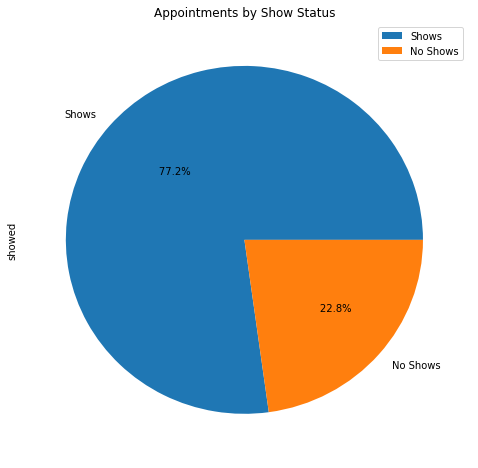

In [265]:
numP = df.showed.value_counts()
print('there are :  {}  patient'.format(numP.sum()) )

pieChart = numP.plot.pie(figsize = (8 ,8 ) , autopct='%11.1f%%' ,labels = ['Shows', 'No Shows'])
pieChart.set_title('Appointments by Show Status', fontsize = 12);
plt.legend();

## Question : (what are the most realition that of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), and make the patient show ?)

In [266]:
# the average age of people who show up and people who didn't

age_S = df.age[showed].mean()
age_NS = df.age[not_showed].mean()
print('the averge people showed is :' + str(age_S) + "\n" + 'the averge people not showed is : ' + str(age_NS))

the averge people showed is :39.0751872648
the averge people not showed is : 35.3291512915


###  see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship)  and the people who came to thier appointment

#### figure  the relation between Age and patients who showed 

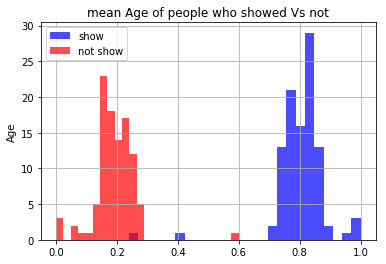

In [267]:
df.groupby('age')['showed'].mean().hist(alpha = 0.7 , bins=25 ,label='show', color='blue')
df.groupby('age')['not_showed'].mean().hist(alpha=0.7 ,bins=25, label='not show',color='red');
plt.ylabel("Age")
plt.title("mean Age of people who showed Vs not")
plt.legend();

#### figure  the relation between Alcoholism and patients who showed 

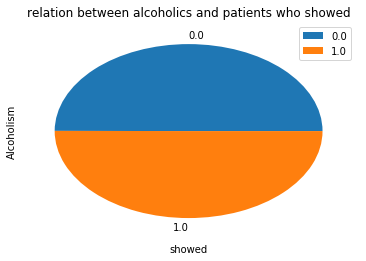

In [268]:

df.groupby('alcoholism')['showed'].mean().plot(kind='pie' )
plt.xlabel("showed")
plt.ylabel('Alcoholism')
plt.title("relation between alcoholics and patients who showed")
plt.legend();

#### figure  the relation between sms_received and patients who showed 

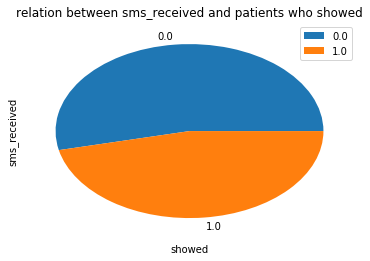

In [269]:
df.groupby('sms_received')['showed'].mean().plot(kind='pie' )
plt.xlabel("showed")
plt.ylabel('sms_received')
plt.title("relation between sms_received and patients who showed")
plt.legend();

#### figure  the relation between Gender and patients who showed 

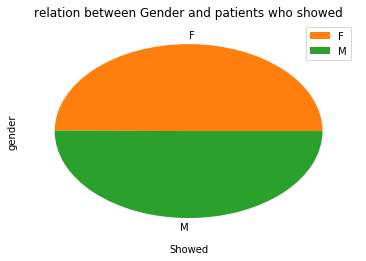

In [270]:
df.groupby('gender')['showed'].mean().plot(kind='pie' )
plt.xlabel("Showed")
plt.ylabel("gender")
plt.title("relation between Gender and patients who showed")
plt.legend();

#### figure  the relation between Scholarship and patients who showed 


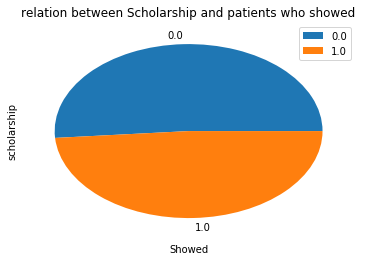

In [271]:
df.groupby('scholarship')['showed'].mean().plot(kind='pie' )
plt.xlabel("Showed")
plt.ylabel("scholarship")
plt.title("relation between Scholarship and patients who showed")
plt.legend();

#### figure  the relation between neighborhood and patients who showed 


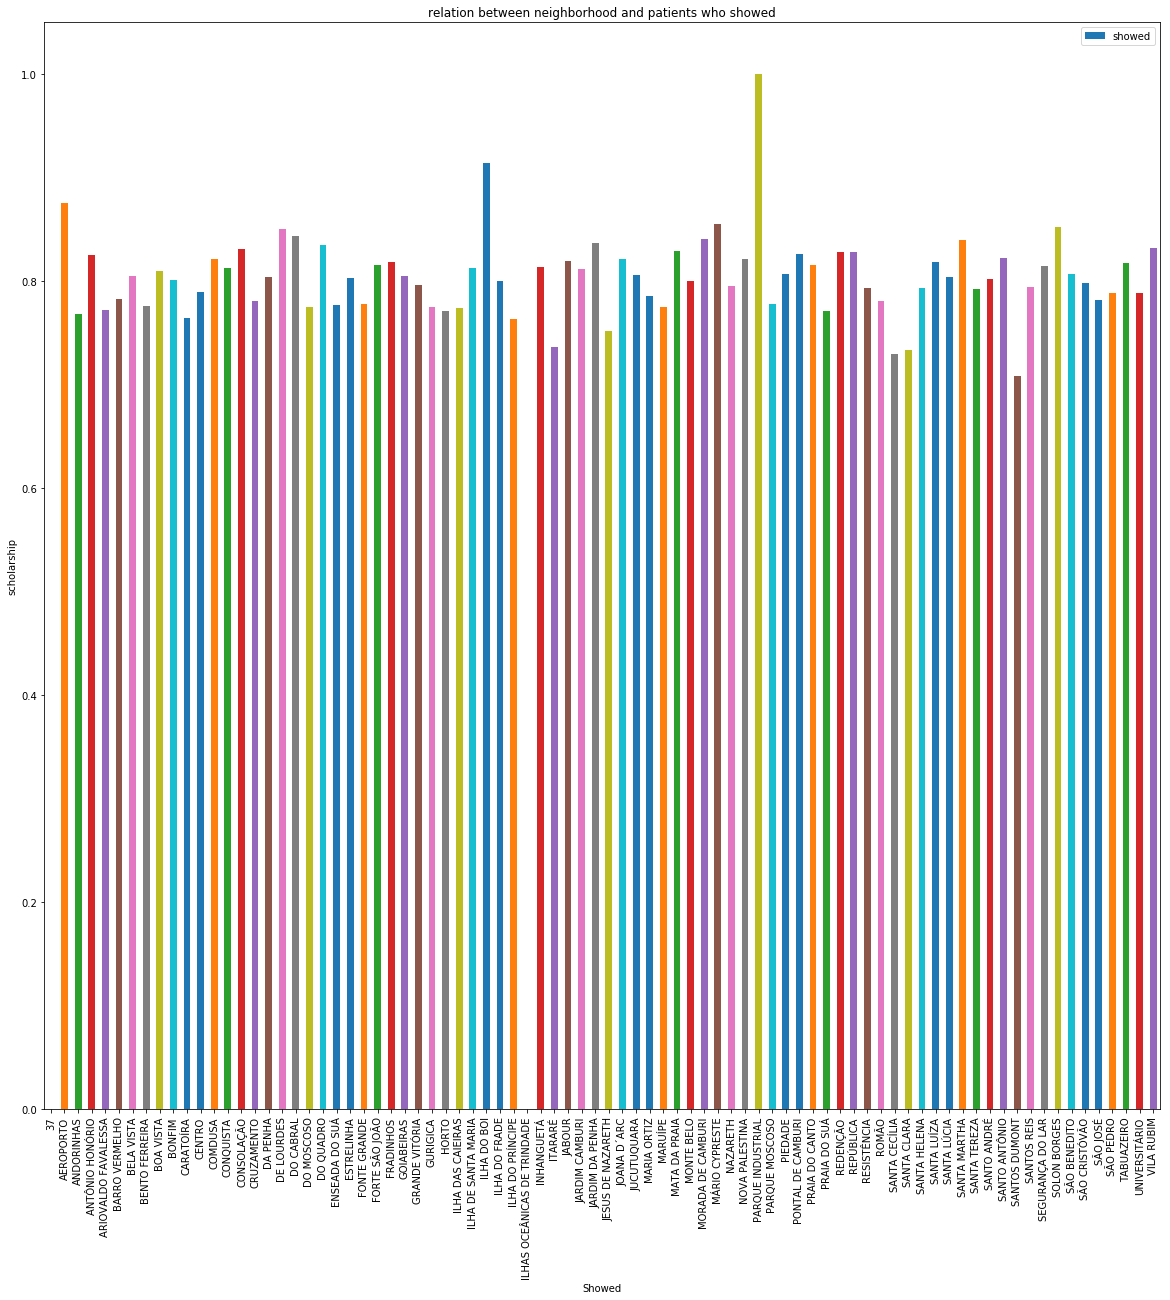

In [272]:
df.groupby('neighborhood')['showed'].mean().plot(kind='bar' ,figsize=(20,20) )
plt.xlabel("Showed")
plt.ylabel("scholarship")
plt.title("relation between neighborhood and patients who showed")
plt.legend();

In [273]:
df.neighborhood.nunique()

82

## Limitations:

* Missing more data that will be more usefull to predict the show of the patient such as weather or employment ,or geographic data

* there we some illogical data such as patients with age 0 or less


<a id='conclusions'></a>
## Conclusions

• The age is the most important feature that matter and affect of patient who will show or not , the average age of people who most likely to show is 39 and the average for people who not likely to show up is 35 

• gender or alcoholic or sending sms for the appiontment isn't affect to make patient come 

• there is a 22.8% of people that schedule an appoinment and didn't come so it like the 1/4 of people most likly to not come after schedule 

In [274]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0